# Predicting the Price of Gold using Random Forest Regressor

### Data was downloaded from Kaggle
#### - https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data

In [1]:
# Importing Needed Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [4]:
gd = pd.read_csv(r'C:\Users\Bora\Management Of RBR\RBR Builds - Documents\RBR Analytics\ML Test\gld_price_data.csv')
gd.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gd.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gd.shape

(2290, 6)

In [7]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
gd.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
gd.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
gd.corr()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<AxesSubplot:>

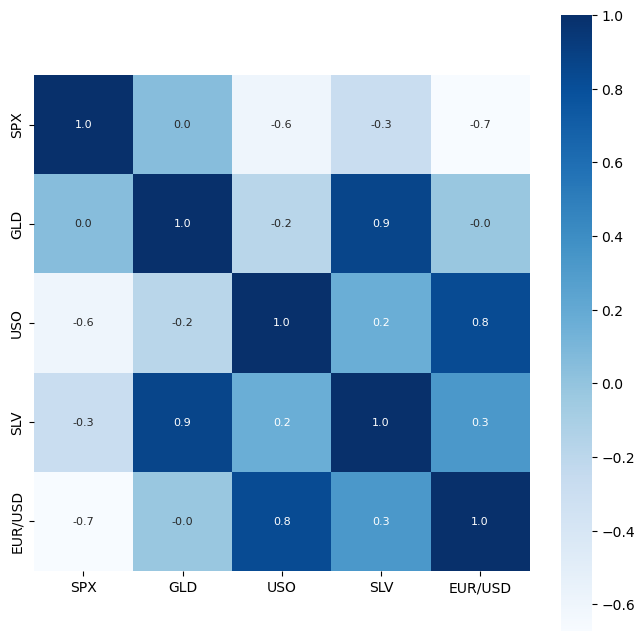

In [15]:
correlation = gd.corr()
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square = True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap='Blues')

In [16]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


c:\Users\Bora\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

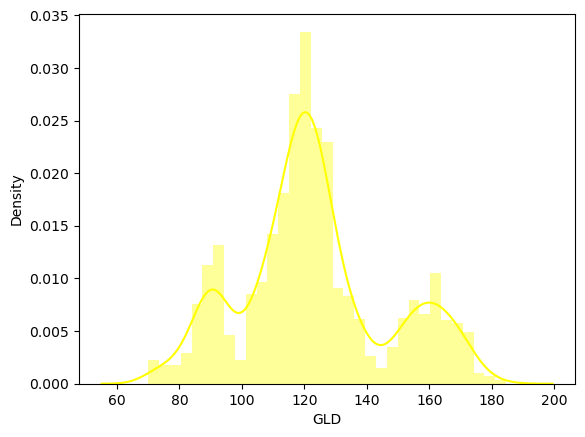

In [18]:
sns.distplot(gd['GLD'], color='yellow')

# Splitting Data into Training and Test Data

In [19]:
X = gd.drop(['Date', 'GLD'], axis = 1)
Y = gd['GLD']

In [21]:
print(X)


              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [23]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.2, random_state=2)

# Model = Random Forest Regressor

In [28]:
regressor = RandomForestRegressor(n_estimators=100)

In [29]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [30]:
test_data_prediction = regressor.predict(x_test)

In [31]:
print(test_data_prediction)

[168.48509964  81.9487     116.04810018 127.70000102 120.64610144
 154.58299802 150.43489826 126.08520062 117.49689861 125.89500092
 116.67390091 171.9080006  141.72799913 167.88089899 115.13000035
 117.51210064 139.31020277 170.3571013  158.75350374 160.26399876
 155.02569999 124.88140014 176.35999917 157.00600374 125.16160033
  93.78339998  77.39980003 120.29010011 119.08659912 167.4181001
  88.19490048 125.35770002  91.19630072 117.63920011 121.11899972
 135.84780079 115.51540144 114.79320102 147.6128998  106.93690085
 104.4310023   87.12789787 126.44110051 117.93130003 152.983199
 119.69049985 108.32089993 108.08409792  93.14450042 127.02979806
  74.82800038 113.72149944 121.3141001  111.23899891 118.9581991
 121.06139952 159.39739984 169.0177011  147.09999693  85.90049876
  94.36110067  86.71619903  90.61239995 118.916801   126.40760063
 127.51889973 170.68389967 122.35839947 117.44219901  98.4959003
 168.04520057 143.23039787 131.95500225 121.14410193 121.39489945
 119.69890058 1

# Checking Accuracy Using R-squared

In [32]:
r_squared_score = metrics.r2_score(y_test, test_data_prediction)
print('R-Squared of test Data: ', r_squared_score)

R-Squared of test Data:  0.9893609370021237


In [34]:
y_test = list(y_test)

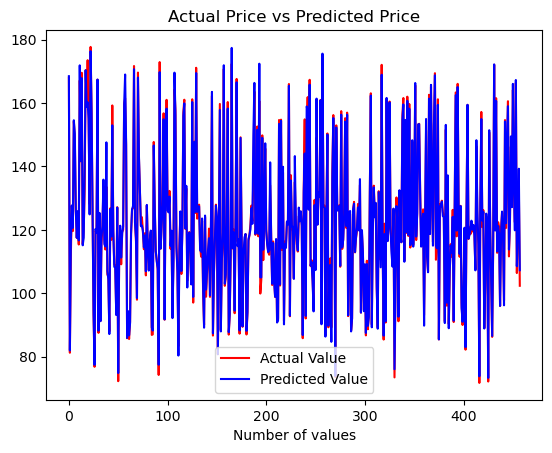

In [35]:
plt.plot(y_test, color = 'red', label ='Actual Value')
plt.plot(test_data_prediction, color = 'blue', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.legend()
plt.show()

# prediction almost spot on a little under but not too bad